In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Integración y diferenciación numérica

Una vez determinado el polinomio, $p_n(x)$, de aproximación a una función tabulada, $f(x)$, en un intervalo de interés, por ejemplo:

<img src="https://drive.google.com/uc?id=1v8IlM60totGnukSqY2icwGAUjWEtkPy-&export=download" width="100%">

> Es de esperarse que al diferenciar $p_n(x)$ o integrarla en forma definida, también aproxime satisfactoriamente la derivada o la integral definida correspondiente a $f(x)$. Sin embargo:

>> En el caso de la diferenciación numérica tiende a generar discrepancias debido a las pendientes de las curvas.

>> Por otro lado, con la integración, el valor de la integral $\int_{x_0}^{x_n}f(x) dx$ está dado por el área bajo la curva de $f(x)$; sucede lo mismo con la aproximación $\int_{x_0}^{x_n}p_n(x) dx$, la integral está dada por el área bajo la curva de $p_n(x)$. 

>>> El error total al integrar $p_n(x)$ entre $x_0$ y $x_n$ puede ser muy pequeño, aún cuando $p_n(x)$ no sea una buena aproximación a $f(x)$.

## Métodos de Newton-Cotes

Para estimar 

$$I = \int_{a}^{b}f(x)dx$$

los métodos de Newton-Cotes se realizan en dos pasos:

**Paso 1**: Dividir el intervalo $[a,b]$ en $n$ intervalos de igual amplitud, cuyos extremos son sucesivamente 

$$x_i = x_0 + i\left(\dfrac{b-a}{n}\right),\,i = 0,1,2,\ldots,n$$

para quedar en la nueva notación $x_0 = a$ y $x_n=b$

**Paso 2**: Se aproxima $f(x)$ por un polinomio $p_n(x)$ de grado $n$, y se integra para obtener la aproximación de $I$.

### Método trapezoidal

En este caso el polinomio es de grado $1$ y el intervalo de integración $[a,b]$ queda tal cual, $x_0=a, x_1 = b$.

<img src="https://drive.google.com/uc?id=1BUi8obLRMkuzXizcGXeM94zf8yQvqB7Y&export=download" width="100%">

Para llevar a cabo la integración

$$\int_{x_0}^{x_1}p_1(x)dx$$

se usa diferencias finitas hacia adelante (o bien, hacia atrás o centrales):

$$f(x)\approx p_1(x)$$

donde 

$$p_1(x) = p_1(x_0 + sh)  = f(x_0) + s \Delta f(x_0)$$

Sustituyendo $p_1(x)$  en la integral

$$\int_{a}^{b}f(x)dx\approx \int_{x_0}^{x_1}[f(x_0)+s\Delta f(x_0)]dx $$

Poniendo la integral en términos de $s$

$$\begin{align*}
x &= x_0 + sh\\
dx &= hds
\end{align*}$$


$$\int_{x_0}^{x_1}[f(x_0)+s\Delta f(x_0)]dx = \int_{0}^{1}h[f(x_0)+s\Delta f(x_0)]ds$$


Al integrar, se tiene

$$h\int_{0}^{1}[f(x_0)+s\Delta f(x_0)]ds = h[sf(x_0) + \dfrac{s^2}{2}\Delta f(x_0)]\lvert_0^1 = h[f(x_0)+\dfrac{\Delta f(x_0)}{2}]$$

como $\Delta f(x_0)= f(x_0+h)-f(x_0)$, se tiene que el algoritmo del método trapezoidal es

$$\int_{a}^{b}f(x)dx\approx \dfrac{h}{2}[f(x_0)+f(x_1)]$$

**Ejemplo**

a) Aproxime el área $A_1$ bajo la curva de la función dada por la tabla siguiente, en el intervalo $a = 500,\,b = 1800$.

|Puntos | 0   | 1    | 2    | 3    | 4    | 5    |
|---    | --- | ---  | ---  | ---  | ---  | ---  |
|$f(x)$ | 9.0 | 13.4 | 18.7 | 23.0 | 25.1 | 27.2 |
|$x$    | 500 | 900  | 1400 | 1800 | 2000 | 2200 |

b) Aproxime $A_2 = \int_0^5(2 + 3\,x)dx$

c) Aproxime $A_3 = \int_{-2}^4(1 + 2\,x + 3\,x^2)dx$

d) Aproxime $A_4 = \int_0^{\pi/2}\sin x\,dx$

In [ ]:
"""
Para resolver el primer inciso vamos a utilizar el método trapz
de la biblioteca numpy.

Referencia
https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html
"""

# Creamos una lista "y" para los datos de la función f(x) en el intervalo
# indicado en el problema
y = np.array([9.0, 13.4, 18.7, 23.0])

# Creamos una lista "x" para los datos de la variable independiente

x = np.array([500, 900, 1400, 1800])



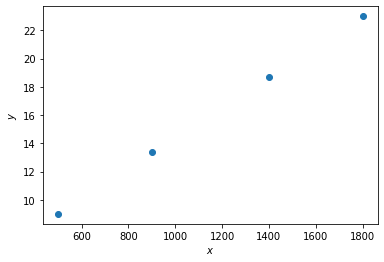

In [ ]:
plt.scatter(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [ ]:
# Manualmente
x0,x1 = 500,1800
f0, f1 = 9.0,23.0
h = x1-x0
area = (h/2)*(f0+f1)
print (area)

20800.0


In [ ]:
A1 = np.trapz (y,x)    # Enviamos los datos al método trapz

print ("El area A1 bajo la curva es: "+str(A1))

El area A1 bajo la curva es: 20845.0


In [ ]:
"""
Para poder comparar, antes de integrar numericamente los ejemplos de 
los incisos b, c y d vamos a resolver el inciso "b" de forma simbólica
utilizando la biblioteca sympy.
"""
from sympy import *
x = Symbol("x", real = True)
fb = 2 + 3*x
I_exacta = integrate(fb,(x,0,5))
print (float(I_exacta))

47.5


In [ ]:
"""
Para resolver los incisos b, c y d utilizando el método trapz:
"""

# a) Crear el dominio de integración

x =  np.linspace(0,5,10,endpoint=True)   # Dominio de integración del ejemplo b

# Crear el integrando del ejemplo b
y =  2 + 3*x    

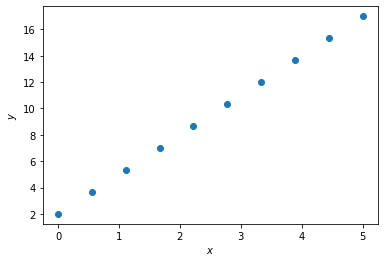

In [ ]:
plt.scatter(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [ ]:
# Utilizar el método trapz

A2 = np.trapz (y,x,)
print ("El area A2 bajo la curva es: ",A2)

El area A2 bajo la curva es:  47.5


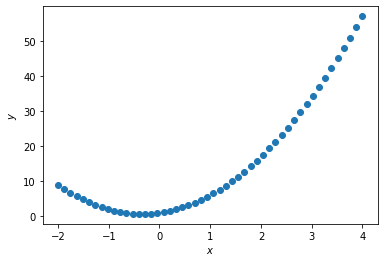

In [ ]:
x =  np.linspace(-2,4,50,endpoint=True)   # Dominio de integración del ejemplo c
y =  1.0 + 2.0*x + 3.0*x**2    # Integrando del ejemplo c
plt.scatter(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [ ]:
# Manualmente
x0, x1 = -2, 4
f0 = 1.0 +2.0*x0 + 3.0*x0**2
f1 = 1.0 +2.0*x1 + 3.0*x1**2
h = x1 - x0
Area = (h/2)*(f0+f1)
Area

198.0

In [ ]:
# Utilizar el método trapz

A3 = np.trapz (y,x)
print ("El area A3 bajo la curva es: ",A3)

El area A3 bajo la curva es:  90.04498125780925


In [ ]:
# Integrando simbólicamente
x = Symbol("x", real = True)
fc = 1.0 + 2.0*x + 3.0*x**2 
I_exacta = integrate(fc,(x,-2,4))
print (float(I_exacta))

90.0


In [ ]:
x =  np.linspace(0,np.pi/2,50,endpoint=True)   # Dominio de integración del ejemplo d
y =  np.sin(x)   # Integrando del ejemplo c
A4 = np.trapz (y,x)
print ("El area A4 bajo la curva es: ",A4)

El area A4 bajo la curva es:  0.999914360566363


In [ ]:
x = Symbol("x", real = True)
fd = sin(x)
I_exacta = integrate(fd,(x,0,np.pi/2))
print (float(I_exacta))

0.9999999999999999


### Método de Simpson

En este caso el polinomio es de grado $2$ y el intervalo de integración $[a,b]$ se divide en:

$$\begin{align*}
x_0 &= a\\
x_1 &= x_0 + 1\dfrac{b-a}{2} = a + \dfrac{b}{2}-\dfrac{a}{2}=\dfrac{1}{2}(b-a)\\
x_2 &= b
\end{align*}$$

Entonces, como el polinomio es de grado $2$, la aproximación a la integral será el área bajo el segmento de parábola comprendida entre $f(x_0)$ y $f(x_2)$

$$\int_{a}^{b} f(x)dx\approx \int_{x_0}^{x_2}p_2(x)dx$$

Utilizando diferencias finitas hacia adelante para expresar la integral de $p_2(x)$

$$\begin{align*}
p_2(x) &= p_2(x_0 + sh) \\
&= f(x_0) + s\Delta f(x_0) + \dfrac{s(s-1)}{2!}\Delta^2f(x_0)
\end{align*}$$

Sustituyendo $p_2(x)$ y expresando la integral en términos de $s$

$$\begin{align*}
\int_a^b f(x)dx &= \int_{x_0}^{x_2}p_2(x)dx\\
&= h \int_{0}^{2}p_2(x_0 + sh)ds
\end{align*}$$

$$\begin{align*}
h \int_{0}^{2}p_2(x_0 + sh)ds &= h \int_{0}^{2}\left[f(x_0) + s\Delta f(x_0) + \dfrac{s(s-1)}{2!}\Delta^2f(x_0)\right] ds\\
&= h\left[sf(x_0) + \dfrac{s^2}{2}\Delta f(x_0) + \dfrac{s^3}{3!}\Delta^2f(x_0)-\dfrac{s^4}{4}\delta^2f(x_0)\right]|_{0}^{2}\\
&= h\left[2f(x_0)+2\Delta f(x_0)+\dfrac{1}{3}\Delta^2f(x_0)\right]
\end{align*}$$

Utilizando la definición de la primera y segunda diferencia finitas hacia adelante:

$$\begin{align*}
\Delta f(x_0) &= f(x_0 + h) - f(x_0) = f(x_1)-f(x_0)\\
\Delta^2f(x_0) & = f(x_0 + 2h) - 2f(x_0 + h) + f(x_0) = f(x_2) - 2f(x_1) + f(x_0)
\end{align*}$$

Con lo cual se obtiene el algoritmo de Simpson

$$\int_{a}^{b} f(x)dx \approx \dfrac{h}{3}\left[f(x_0) + 4f(x_1) + f(x_2) \right] $$




Graficamente

<img src="https://drive.google.com/uc?id=1udYOqnNpBBAX2Dju2mBxHI5Fdg7Uvor5&export=download" width="100%">


**Ejemplo** Utilizar el método de Simpson para aproximar las integrales del ejemplo anterior.

$$\int_{a}^{b} f(x)dx \approx \dfrac{h}{3}\left[f(x_0) + 4f(x_1) + f(x_2) \right] $$

a) Aproxime el área $A_1$ bajo la curva de la función dada por la tabla siguiente, en el intervalo $a = 500,\,b = 1800$.

|Puntos | 0   | 1    | 2    | 3    | 4    | 5    |
|---    | --- | ---  | ---  | ---  | ---  | ---  |
|$f(x)$ | 9.0 | 13.4 | 18.7 | 23.0 | 25.1 | 27.2 |
|$x$    | 500 | 900  | 1400 | 1800 | 2000 | 2200 |

b) Aproxime $A_2 = \int_0^5(2 + 3\,x)dx$

c) Aproxime $A_3 = \int_{-2}^4(1 + 2\,x + 3\,x^2)dx$

d) Aproxime $A_4 = \int_0^{\pi/2}\sin x\,dx$

In [ ]:
from scipy.integrate import simps

In [ ]:
# a) 
# Utilizando el método sims de scipy
y = np.array([9.0, 13.4, 18.8, 23.0])
x = np.array([500, 900, 1400, 1800])

A1 = simps(y,x)
print("El área A1 es: " + str(A1))

El área A1 es: 20898.75


In [ ]:
# Manualmente
from scipy.interpolate import lagrange
pol = lagrange(x,y)
a,b = 500,1800
h = (b-a)/2
x0, fx0 = a, 9.0
x1 = x0 + h
fx1 = pol(x1)
x2,fx2 = b, 23.0

print(h,x0,fx0,x2,fx2, x1,fx1)

650.0 500 9.0 1800 23.0 1150.0 16.117361111111133


In [ ]:
Area = (h/3)*(fx0 + 4*fx1 + fx2)
Area

20901.71296296298

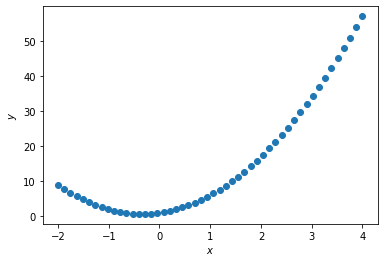

In [ ]:
# c)
x =  np.linspace(-2,4,50,endpoint=True)   # Dominio de integración del ejemplo c
y =  1.0 + 2.0*x + 3.0*x**2    # Integrando del ejemplo c
plt.scatter(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()


In [ ]:
# Manualmente
a, b = -2, 4
h = 0.5*(b-a)
x0 = a
x1 = x0 + h
x2 = b
fc = lambda x : 1.0 +2.0*x +3.0*x**2
Area = (h/3)*(fc(x0) + 4*fc(x1) + fc(x2))
Area

90.0

In [ ]:
A3 = simps(y,x)
print("El área A1 es: " + str(A3))

El área A1 es: 90.00091798485326


## Caso general

Aquí el polinomio de interpolación es degrado $n$, y el intervalo de integración $[a,b]$ se divide en $n$ subintervalos y da lugar a $n+1$ abscisas equidistantes

$$x_0, x_1, \ldots, x_n,\, \text{con}\, x_0=a\,\text{y}\,x_n=b $$

Considerando $p_n(x)$, la aproximación a $\int_{a}^{b}f(x)dx$ está dada por

$$\begin{align*}
\int_a^b f(x)dx \approx \int_{x_0}^{x_n}p_n(x)dx &= h\int_0^n p_n(x_0 + sh)ds\\
&= h\int_0^n[f(x_0) + s\Delta f(x_0) + \dfrac{s(s-1)}{2!}\Delta^2 f(x_0) + \dfrac{s(s-1)(s-2)}{3!}\Delta^3 f(x_0) + \\
& \ldots +\dfrac{s(s-1)(s-2)\ldots (s-(n-1))}{n!}\Delta^n f(x_0) ]ds
\end{align*}$$

Integrando los cinco primeros términos

$$\begin{align*}
h\int_0^n p_n(x_0 +sh)ds &= h[sf(x_0) + \dfrac{s^2}{2}\Delta f(x_0) + \left(\dfrac{s^3}{6}-\dfrac{s^2}{4}\right)\Delta^2 f(x_0)\\
& +\left(\dfrac{s^4}{24}-\dfrac{s^3}{6}+\dfrac{s^2}{6}\right)\Delta^3 f(x_0) + \left(\dfrac{s^5}{120}-\dfrac{s^4}{16}+\dfrac{11s^3}{72} - \dfrac{s^2}{8}\right)\Delta^4 f(x_0)  \\
& + \text{términos faltantes}]|_0^n
\end{align*}$$

Los términos del límite inferior son cero, por lo tanto

$$\begin{align*}
\int_a^b f(x)dx &\approx h[nf(x_0) + \dfrac{n^2}{2}\Delta f(x_0) + \left(\dfrac{n^3}{6}-\dfrac{n^2}{4}\right)\Delta^2 f(x_0)\\
&+ \left(\dfrac{n^4}{24}-\dfrac{n^3}{6}+\dfrac{n^2}{6}\right)\Delta^3 f(x_0) + \left(\dfrac{n^5}{120}-\dfrac{n^4}{16}+\dfrac{11n^3}{72}-\dfrac{n^2}{8}\right)\Delta^4 f(x_0)\\
& + \text{términos faltantes}]
\end{align*}$$

### Fórmulas de Newton-Cotes

Para cuando 

> $n = 1$, se le llama trapezoidal

$$\int_{x_0}^{x_1} f(x)dx\approx \dfrac{h}{2}\left[f(x0)+f(x_1)\right]$$

> $n = 2$, se le llama Simpson $1/3$

$$\int_{x_0}^{x_2} f(x)dx\approx \dfrac{h}{3}\left[f(x0)+4f(x_1)+f(x_2)\right]$$

> $n = 3$, se le llama Simpson $3/8$

$$\int_{x_0}^{x_3} f(x)dx\approx \dfrac{3h}{8}\left[f(x0)+3f(x_1)+3f(x_2) + f(x_3)\right]$$

> $n = 4$

$$\int_{x_0}^{x_4} f(x)dx\approx \dfrac{2h}{45}\left[7f(x0)+32f(x_1)+12f(x_2) + 32f(x_3) + 7f(x_4)\right]$$

# Métodos compuestos de integración

Se utiliza cuando el intervalo de integración es amplio, y resulta conveniente dividirlo en subintervalos, aproximando cada subintervalo por medio de un polinomio.

## Trapezopidal compuesto

**Paso 1**: Dividir en el intervalo de integración ,$[a,b]$, en $n$ subintervalos.

$$I = \int_a^b f(x)dx\approx \int_{a=x_0}^{x_1}p_1(x)dx + \int_{x_1}^{x_2}p_2(x)dx + \ldots + \int_{x_{n-1}}^{x_n=b}p_n(x)dx$$

<img src="https://drive.google.com/uc?id=10ucQshiG0s_jj8TLydZ3pcZmDhcVKkUo&export=download" width="90%">

**Paso 2**: Aproximar cada subintervalor por un polinomio de primer grado $p_1(x)$.

**Paso 3**: Aplicar la fórmula trapezoidal a cada subintervalo para obtener el área de cada trapezoide.

$$I = \dfrac{x_1-x_0}{2}\left[f(x_0)+f(x_1)\right] + \dfrac{x_2-x_1}{2}\left[f(x_1)+f(x_2)\right] + \ldots + \dfrac{x_n-x_{n-1}}{2}\left[f(x_{n-1})+f(x_n)\right]$$

**Paso 4**: Sumar todas las áreas de los subintervalos para obtener el área bajo la curva de $f(x)$.

> Si todos los subintervalos son del mismo tamaño 

$$h = x_{i+1}-x_i,\,\text{para } i=0,1,\ldots,(n-1)$$

>> Entonces

$$\begin{align*}
I &\approx \dfrac{h}{2}\left[f(x_0)+2f(x_1) + 2f(x_2)+\ldots+2f(x_{n-1})+f(x_n)\right]\\
&\approx\dfrac{h}{2}\left[f(x_0)+2\sum_{i=1}^{n-1}f(x_i)+f(x_n)\right]
\end{align*}$$





**Ejemplo** Mediante el algoritmo trapezoidal compuesto, aproxime el área bajo la curva de la siguiente funcion, entre $x=-1$ y $x=4$.

|Puntos | 0   | 1    | 2    | 3    | 4    | 5    |
|---    | --- | ---  | ---  | ---  | ---  | ---  |
|$f(x)$ | 8.0 | 10.0 | 10.0 | 20.0 | 76.0 | 238 |
|$x$    | -1 | 0  | 1 | 2 | 3 | 4 |

Compárese el resultado obtenido con la solución analítica de $f(x)=x^4 - 2x^2 + x + 10$.

$$\begin{align*}
I &\approx \dfrac{h}{2}\left[f(x_0)+2f(x_1) + 2f(x_2)+\ldots+2f(x_{n-1})+f(x_n)\right]\\
&\approx\dfrac{h}{2}\left[f(x_0)+2\sum_{i=1}^{n-1}f(x_i)+f(x_n)\right]
\end{align*}$$

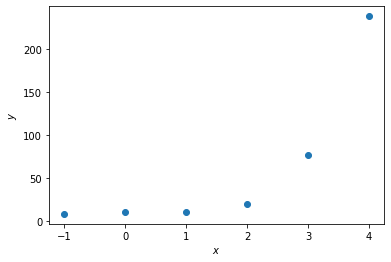

In [ ]:
x = np.array([-1,0,1,2,3,4])
y = np.array([8.0, 10, 10, 20, 76, 238])
plt.scatter(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()


In [ ]:
# Manualmente trapezoidal compuesto
h = 1.0
suma = 0.0
for i in range(1,len(y)-1):
  suma = suma + y[i]

Area = 0.5*h*(y[0] + 2*suma + y[-1])
Area

239.0

In [ ]:
# Manualmente trapezoidal simple
a,b = -1,4
h = b-a
a = 0.5*h*(y[0] + y[-1])
a

615.0

In [ ]:
# Integrando simbólicamente
x = Symbol("x", real = True)
fc = 10.0 + x - 2.0*x**2 + x**4 
I_exacta = integrate(fc,(x,-1,4))
print (float(I_exacta))

219.16666666666669


## Simpson compuesto

Para aplicar el método de Simson se requieren de dos subintervalos, de $[x_0,x_1]$ y de $[x_1,x_2]$:

$$\int_{a}^{b} f(x)dx \approx \dfrac{h}{3}\left[f(x_0) + 4f(x_1) + f(x_2) \right] $$

Por lo tanto:

**Paso 1**: Dividir el intervalo de integración $[a,b]$ en un número de subintervalos igual a $2n$.

<img src="https://drive.google.com/uc?id=1qsDxCyp-1pL1uQ_VgpLS5wZkT7Q-rGGq&export=download" width="90%">

**Paso 2**: Aproximar cada subintervalor por un polinomio de segundo grado $p_2(x)$.

$$I = \int_a^b f(x)dx\approx \int_{x_0=a}^{x_1}p_2^{1}(x)dx + \int_{x_2}^{x_4}p_2^{2}(x)dx + \ldots + \int_{x_{n-2}}^{x_n=b}p_2^{n}(x)dx$$

donde $p_2^{1}(x), p_2^{2}(x),\ldots,p_2^{n}(x)$ es el polinomio que pasa por tres puntos consecutivos.

**Paso 3**: Aplicar el método de Simpson a cada subintervalo para obtener el área de cada uno.

$$I \approx \dfrac{h_1}{3}\left[f(x_0) + 4f(x_1) +f(x_2)\right] + \dfrac{h_2}{3}\left[f(x_2) + 4f(x_3) +f(x_4)\right]+\ldots+\dfrac{h_n}{3}\left[f(x_{n-2}) + 4f(x_{n--}) +f(x_n)\right] $$

donde

$$\begin{align*}
h_1 &= x_1-x_0 = x_2-x_1\\
h_1 &= x_3-x_2 = x_4-x_3\\
&\vdots\\
h_n &= x_{n-1}-x_{n-2} = x_n-x_{n-1}\\
\end{align*}$$

**Paso 4**: Sumar todas las áreas de los subintervalos para obtener el área bajo la curva de $f(x)$.

> Si todos los subintervalos son del mismo tamaño 

$$h_1=h_2=\ldots=h_n$$

>> Entonces

$$\begin{align*}
I &\approx \dfrac{h}{3}\left[f(x_0) +4f(x_1)+f(x_2)\right] + \dfrac{h}{3}\left[f(x_2) +4f(x_3)+f(x_4)\right] + \ldots+ \dfrac{h}{3}\left[f(x_{n-2}) +4f(x_{n-1})+f(x_n)\right]\\
&\approx \dfrac{h}{3}\left[f(x_0)+4\sum_{i=1\\\Delta i = 2}^{n-1}f(x_i)+2\sum_{i=2\\\Delta i = 2}^{n-2}f(x_i)+f(x_n)\right]
\end{align*}$$



**Ejemplo** Mediante el algoritmo Simpson compuesto, aproxime el área bajo la curva de la siguiente funcion, entre $x=-1$ y $x=4$.

|Puntos | 0   | 1    | 2    | 3    | 4    | 5    |
|---    | --- | ---  | ---  | ---  | ---  | ---  |
|$f(x)$ | 8.0 | 10.0 | 10.0 | 20.0 | 76.0 | 238 |
|$x$    | -1 | 0  | 1 | 2 | 3 | 4 |

Compárese el resultado obtenido con la solución analítica de $f(x)=x^4 - 2x^2 + x + 10$.

In [ ]:
"""
Aplicar Simpson en los puntos 0,1,2 y en 2,3,4.
En los puntos 4 y 5 aplicar el método trapezoidal.
"""
x = np.array([-1,0,1,2,3,4])
y = np.array([8.0, 10, 10, 20, 76, 238])
h = 1.0

Area1 = (h/3.0)*(y[0]+4*y[1]+ y[2]) + (h/3.0)*(y[2]+4*y[3]+ y[4])
Area1

74.66666666666666

In [ ]:
# Trapezoidal en los puntos 4 y 5.
Area2 = 0.5*h*(y[4]+y[5])
Area2

157.0

In [ ]:
AreaTotal = Area1 + Area2
AreaTotal

231.66666666666666

In [ ]:
# Utilizando simps de Scipy con la opción even = "first"
"""
A este método le podemos indicar que utilice el método de Simpson para 
los primeros N-2 intervalos y el método trapezoidal en el último 
intervalo
"""
simps(y,x,even="first")

231.66666666666666

In [ ]:
# Utilizando simps de Scipy con la opción even = "last"
"""
Para indicarle que utilice el método de Simpson para 
los últimos N-2 intervalos y el método trapezoidal en el primer 
intervalo
"""
simps(y,x,even="last")

219.66666666666666

In [ ]:
# Utilizando simps de Scipy con la opción even = "avg"
"""
A trapezoidal rule on the last interval and 2) use the last N-2 intervals
with a trapezoidal rule on the first interval.
"""
simps(y,x, even="avg")

225.66666666666666

## El método _quad_ de scipy

In [ ]:
"""
Otra forma de resolver los incisos b, c y d es utilizando el método 
quad de la biblioteca scipy.

Referencia 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
"""

from scipy.integrate import quad

# Primero creamos una función fb con el integrando

def fb(x):
    return 2 + 3*x    # Integrando del inciso b

# Establecemos el dominio de integración
a = 0.0    # Limite inferior
b = 5.0    # Limite superior

A2,error = quad(fb,a,b)    # Enviamos la función y el dominio de integración

print ("El area A2 bajo la curva es: " +str(A2))    # Aquí nada más imprimo el resultado

El area A2 bajo la curva es: 47.5


In [ ]:
# Imprimimos el error
print (error)

5.273559366969494e-13


In [ ]:
def fc(x):
    return 1 + 2*x + 3*x**2    # Integrando del inciso c

# Establecemos el dominio de integración
a = -2    # Limite inferior
b = 4    # Limite superior

A3 = quad(fc,a,b)    # Enviamos la función y el dominio de integración

print ("El area A3 bajo la curva es: "+str(A3[0]))

El area A3 bajo la curva es: 90.0


In [ ]:
def fd(x):
    return np.sin(x)    # Integrando del inciso d

# Establecemos el dominio de integración
a = 0    # Limite inferior
b = (np.pi/2)    # Limite superior

A4 = quad(fd,a,b)    # Enviamos la función y el dominio de integración

print ("El area A4 bajo la curva es: "+str(A4[0]))

El area A4 bajo la curva es: 0.9999999999999999


# Método de Romberg

Método de Romberg genera una matriz triangular cuyos elementos son estimaciones numéricas de la integral definida siguiente:

$$ I = \int _{a}^{b}f(x)\,dx$$


La integral anterior se puede expresar como 

$$E = c\,h^r\,f^{(r)}(\xi)$$

donde $c$ es independiente de $h$, $r$ es un entero positivo y $\xi$ es un punto desconocido en $[a,b]$.

Al realizar dos aproximaciones a la integral,$I_1$ y $I_2$, con tamaños de paso distintos,$h_1$ y $h_2$, se tiene:

$$\begin{align*}
I - I_1&= c\,h_1^r\,f^{(r)}(\xi_1)\\
I - I_2&= c\,h_2^r\,f^{(r)}(\xi_2)
\end{align*}$$


Dividiendo estas dos ecuaciones

$$\dfrac{I-I_1}{I-I_2} = \dfrac{c\,h_1^r\,f^{(r)}(\xi_1)}{c\,h_2^r\,f^{(r)}(\xi_2)}$$

de donde

$$I = \dfrac{h_1^rI_2-h_2^rI_1}{h_1^r-h_2^r}$$

Si se hace $h_2=h_1/2$, se tiene 

$$I\approx \dfrac{2^rI_2-I_1}{2^r-1}$$


La integración de Romberg, es efectivo cuando $f^{(r)}(x)$ no varía bruscamente en $[a, b]$, y no cambia de signo en dicho intervalo. En estos casos, el método de Romber permiten obtener una mejor aproximación a $I$ a partir de $I_1$ y $I_2$, sin repetir el proceso de integración y con cálculos breves.

Para $r=2$

$$I\approx \dfrac{2^2I_2-I_1}{2^2-1}=\dfrac{4I_2-I_1}{3}$$

Sistematizando, denótese por $I_k^{(0)}$ las aproximaciones de $I$ obtenidas empleando $2^k$ trapezoides. Para obtener mejores aproximaciones de $I$ mediante $I_k^{(0)}$ e  $I_{k+1}^{(0)}$, se aplica la extrapolación de Richardson

$$I\approx \dfrac{2^2I_{k+1}^{(0)}-I_k^{(0)}}{2^2-1}$$

Este resultado se denota como $I_k^{(1)}$. Estos valores sirven para producir una segunda extrapolación y obtener una mejor aproximación de $I$. Con el empleo de $I_k^{(1)}$ e $I_{k+1}^{(1)}$ se obtiene

$$I\approx \dfrac{2^4I_{k+1}^{(1)}-I_k^{(1)}}{2^4-1}$$

que se denota como $I_k^{(2)}$. Este proceso puede continuar en tanto cada iteración responda al algoritmo.


$$I_k^{(m)}=\dfrac{4^mI_{k+1}^{(m-1)}-I_k^{(m-1)}}{4^m-1};\,m=1,2,3,\ldots$$



**Ejemplo**: Encuentre una aproximación de la integral

$$\int_0^1 \sin(\pi x)dx$$

In [ ]:
"""
El método de Romber se encuentra en la biblioteca scipy

Ref:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html
"""

from scipy.integrate import romberg
f = lambda x: np.sin(np.pi*x)   # Creamos la función con el integrando

# Mandamos la función y el dominio de integración
# a, b = 0, 1

aprox = romberg(f, 0, 1, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f2bec2688c0> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.000000 
     2  0.500000  0.500000  0.666667 
     4  0.250000  0.603553  0.638071  0.636165 
     8  0.125000  0.628417  0.636705  0.636614  0.636622 
    16  0.062500  0.634573  0.636625  0.636620  0.636620  0.636620 
    32  0.031250  0.636108  0.636620  0.636620  0.636620  0.636620  0.636620 

The final result is 0.6366197723680019 after 33 function evaluations.


In [ ]:
# Si no se desea la tabla
aprox = romberg(f, 0, 1, show=False)
print (aprox)

0.6366197723680019


# Cuadratura de Gauss

Integre la función

$$\dfrac{1}{\sqrt{2\,\pi}}e^{\frac{-x^2}{2}}$$
en el intervalo $[-0.8,1.5]$ por cuadratura de Gauss.

In [ ]:
"""
El método de cuadratura de Gauss se encuentra en la biblioteca scipy

Ref:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature
""" 

from scipy.integrate import quadrature

# Creamos la función con el integrando
f = lambda x: (1/(np.sqrt(2*np.pi)))*np.exp(-x**2/2)  

# Mandamos la función y el dominio de integración al método 

aprox = quadrature(f, -0.8, 1.5)

print (aprox)

(0.721337400322854, 1.0183873078162264e-08)


In [ ]:
aprox[0]

0.721337400322854